# **DLI 예측**

# ARIMA, LSTM, Prophet,RandomForest 비교

In [ ]:
import numpy as np
import pandas as pd
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
#from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
path = '/content/drive/MyDrive/ABCLABS/전북DLI/전북김제.xlsx'
#path = '/content/drive/MyDrive/ABCLABS/전북진안.xlsx'
data = pd.read_excel(path, sheet_name = '계산')

In [ ]:
df = data.loc[:,['dates','DLI']]
df.head()

,dates,DLI
0,2016-01-01,10.752194
1,2016-01-02,10.365014
2,2016-01-03,15.690333
3,2016-01-04,13.557667
4,2016-01-05,9.063833


In [ ]:
df.dates = pd.to_datetime(df.dates)

In [ ]:
df = df.set_index("dates")
df.head()

,DLI
dates,
2016-01-01,10.752194
2016-01-02,10.365014
2016-01-03,15.690333
2016-01-04,13.557667
2016-01-05,9.063833


In [ ]:
df.index_freq = 'D'

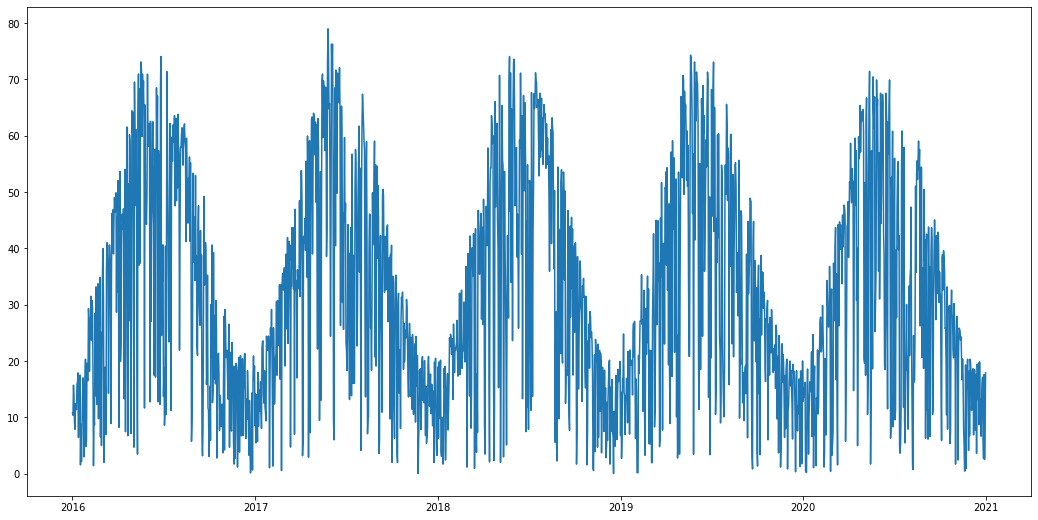

In [ ]:
plt.figure(figsize=(18,9))
plt.plot(df.index, df["DLI"], linestyle="-")
plt.xlabel=('dates')
plt.ylabel=('DLI')
plt.show();

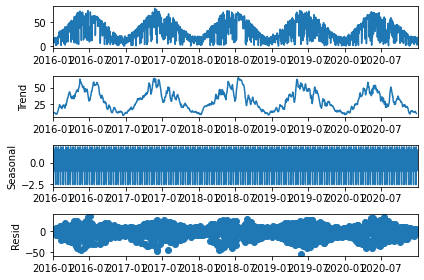

In [ ]:
df.sort_index(inplace=True)
a = seasonal_decompose(df, model = "add",freq = 12)
a.plot();

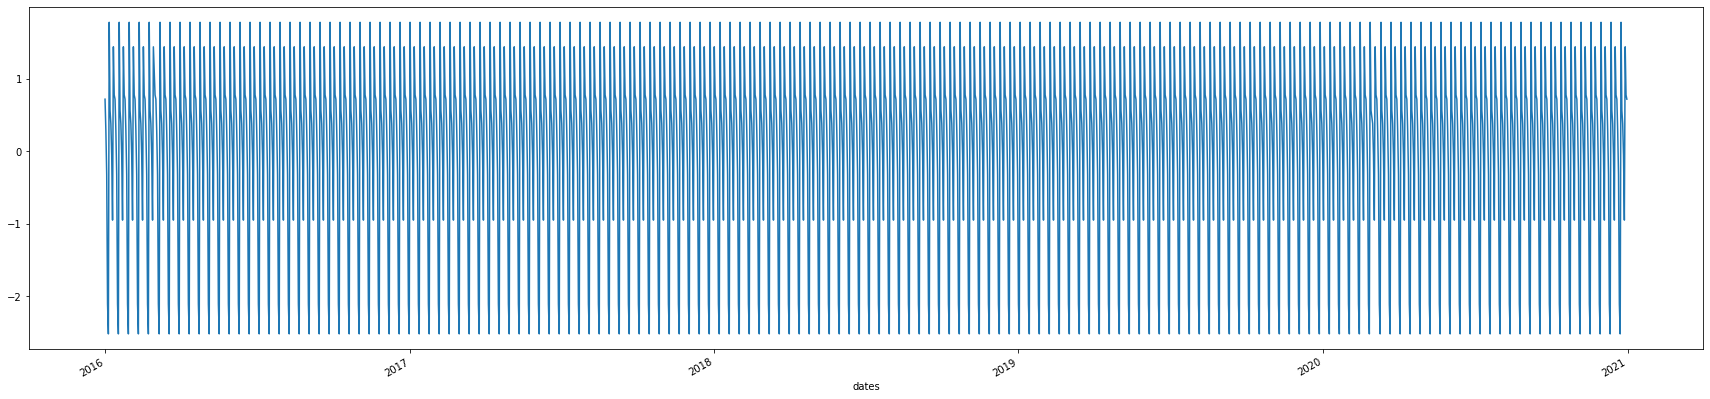

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (30,7))
a.seasonal.plot();

In [ ]:
train_data = df.loc[:'2020-09-01']
test_data = df.loc['2020-09-01':'2021-01-01']

In [ ]:
from pmdarima.arima import auto_arima
auto_arima(df['DLI'], 
           seasonal=True, 
           m=12,max_p=7, max_d=5,max_q=7, 
           max_P=4, max_D=4,max_Q=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1825
Model:               SARIMAX(1, 0, 2)   Log Likelihood               -7408.100
Date:                Mon, 12 Jul 2021   AIC                          14826.201
Time:                        03:48:40   BIC                          14853.747
Sample:                             0   HQIC                         14836.362
                               - 1825                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2878      0.174      1.651      0.099      -0.054       0.629
ar.L1          0.9902      0.005    213.263      0.000       0.981       0.999
ma.L1         -0.6028      0.021    -29.133      0.000      -0.643      -0.562
ma.L2         -0.2570      0.019    -13.196      0.000      -0.295      -0.219
sigma2       196.3378      6.727     29.186      0.000     183.153     209.523
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                92.83
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                            -0.50
Prob(H) (two-sided):                  0.64   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
arima_model = SARIMAX(train_data['DLI'], order = (1,0,2), seasonal_order = (1,2,4,12))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           SARIMAX Results                                           
=====================================================================================================
Dep. Variable:                                           DLI   No. Observations:                 1704
Model:             SARIMAX(1, 0, 2)x(1, 2, [1, 2, 3, 4], 12)   Log Likelihood               -6942.833
Date:                                       Mon, 12 Jul 2021   AIC                          13903.666
Time:                                               03:50:43   BIC                          13952.505
Sample:                                                    0   HQIC                         13921.757
                                                      - 1704                                         
Covariance Type:                                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9925      0.005    184.863      0.000       0.982       1.003
ma.L1         -0.5952      0.021    -27.764      0.000      -0.637      -0.553
ma.L2         -0.2676      0.020    -13.102      0.000      -0.308      -0.228
ar.S.L12      -0.9995      0.355     -2.815      0.005      -1.696      -0.304
ma.S.L12      -0.9860      6.314     -0.156      0.876     -13.361      11.389
ma.S.L24      -1.0086      4.322     -0.233      0.815      -9.479       7.462
ma.S.L36       0.9860      6.487      0.152      0.879     -11.728      13.700
ma.S.L48       0.0086      0.062      0.139      0.889      -0.113       0.131
sigma2       202.8750   1302.267      0.156      0.876   -2349.522    2755.272
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               105.27
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.16   Skew:                            -0.52
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
arima_model = SARIMAX(train_data['DLI'], order = (1,0,2), seasonal_order = (1,2,4,12))
arima_result = arima_model.fit()

In [ ]:
test_data.head()

,DLI
dates,
2020-09-01,41.517181
2020-09-02,6.271056
2020-09-03,36.007792
2020-09-04,42.526389
2020-09-05,11.824875


In [ ]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df), typ="levels").rename("ARIMA Predictions")
arima_pred.index = pd.to_datetime(arima_pred.index,unit="D", origin='2016-01-01')
arima_pred


2020-08-31    42.543113
2020-09-01    37.907516
2020-09-02    37.479554
2020-09-03    35.501839
2020-09-04    39.279271
                ...    
2020-12-26    40.491987
2020-12-27    37.549432
2020-12-28    38.516907
2020-12-29    40.179003
2020-12-30    36.376234
Name: ARIMA Predictions, Length: 122, dtype: float64

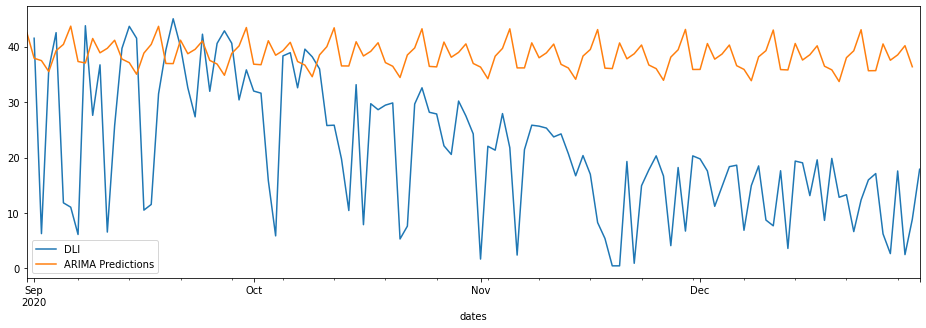

In [ ]:
test_data['DLI'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);


In [ ]:
arima_rmse_error = rmse(test_data['DLI'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['DLI'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 436.2051488508783
RMSE Error: 20.88552486414642
Mean: 31.00258089802134


In [ ]:
test_data['ARIMA_Predictions'] = arima_pred

# **LSTM Forecast**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 365
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lstm_model.fit_generator(generator,epochs=10)

Epoch 1/10
1339/1339 [==============================] - 264s 196ms/step - loss: 0.0562
Epoch 2/10
1339/1339 [==============================] - 260s 194ms/step - loss: 0.0384
Epoch 3/10
1339/1339 [==============================] - 261s 195ms/step - loss: 0.0366
Epoch 4/10
1339/1339 [==============================] - 260s 194ms/step - loss: 0.0368
Epoch 5/10
1339/1339 [==============================] - 260s 194ms/step - loss: 0.0347
Epoch 6/10
1339/1339 [==============================] - 260s 194ms/step - loss: 0.0353
Epoch 7/10
1339/1339 [==============================] - 260s 194ms/step - loss: 0.0340
Epoch 8/10
1339/1339 [==============================] - 260s 194ms/step - loss: 0.0310
Epoch 9/10
1339/1339 [==============================] - 260s 194ms/step - loss: 0.0309
Epoch 10/10
1339/1339 [==============================] - 259s 194ms/step - loss: 0.0331


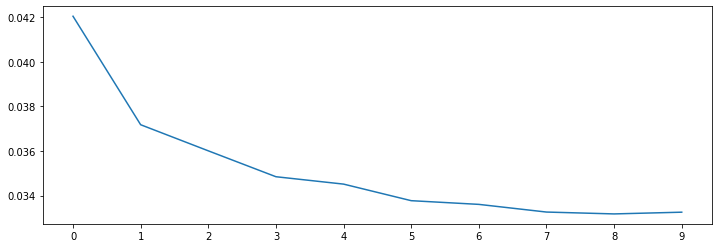

In [ ]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [ ]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [ ]:
lstm_predictions_scaled

[array([0.5032842], dtype=float32),
 array([0.4761544], dtype=float32),
 array([0.46173048], dtype=float32),
 array([0.44811392], dtype=float32),
 array([0.4353732], dtype=float32),
 array([0.42292547], dtype=float32),
 array([0.41060835], dtype=float32),
 array([0.39835334], dtype=float32),
 array([0.38609684], dtype=float32),
 array([0.37381774], dtype=float32),
 array([0.36160636], dtype=float32),
 array([0.34945682], dtype=float32),
 array([0.33746696], dtype=float32),
 array([0.32566908], dtype=float32),
 array([0.31405237], dtype=float32),
 array([0.30261266], dtype=float32),
 array([0.29134417], dtype=float32),
 array([0.28037542], dtype=float32),
 array([0.26977006], dtype=float32),
 array([0.2594964], dtype=float32),
 array([0.24952988], dtype=float32),
 array([0.24005938], dtype=float32),
 array([0.2312502], dtype=float32),
 array([0.22306123], dtype=float32),
 array([0.21570076], dtype=float32),
 array([0.20922033], dtype=float32),
 array([0.20358518], dtype=float32),
 array

In [ ]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

In [ ]:
test_data['LSTM_Predictions'] = lstm_predictions

In [ ]:
test_data

,DLI,ARIMA_Predictions,LSTM_Predictions
dates,,,
2020-09-01,41.517181,37.907516,39.742237
2020-09-02,6.271056,37.479554,37.599908
2020-09-03,36.007792,35.501839,36.460913
2020-09-04,42.526389,39.279271,35.385670
2020-09-05,11.824875,40.407433,34.379588
...,...,...,...
2020-12-27,2.665833,37.549432,13.934692
2020-12-28,17.572285,38.516907,13.934692
2020-12-29,2.484938,40.179003,13.934692


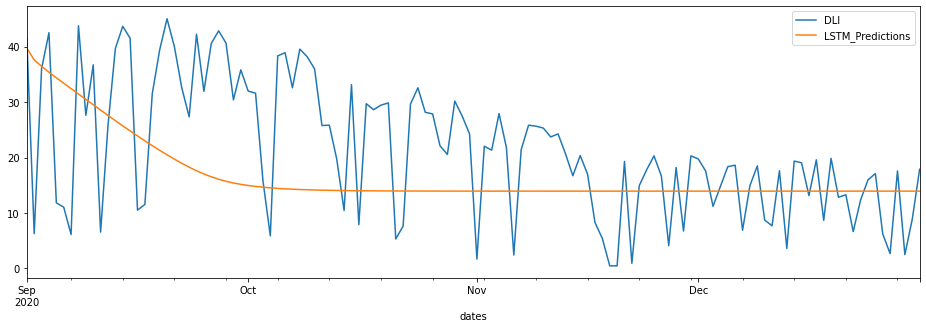

In [ ]:
test_data['DLI'].plot(figsize = (16,5), legend=True)
test_data['LSTM_Predictions'].plot(legend = True)

In [ ]:
lstm_rmse_error = rmse(test_data['DLI'], test_data["LSTM_Predictions"])
lstm_mse_error = lstm_rmse_error**2
mean_value = df['DLI'].mean()

print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}')

MSE Error: 165.78582937355122
RMSE Error: 12.875784611958652
Mean: 31.00258089802134


# **Prophet Forecast**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2016-01-01 to 2020-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DLI     1825 non-null   float64
dtypes: float64(1)
memory usage: 28.5 KB


In [ ]:
df_pr = df.copy()
df_pr = df.reset_index()

In [ ]:
df_pr.columns = ['ds','y']

In [ ]:
train_data_pr = df_pr.loc[:1702]
test_data_pr = df_pr.loc[1702:]

In [ ]:
train_data_pr

,ds,y
0,2016-01-01,10.752194
1,2016-01-02,10.365014
2,2016-01-03,15.690333
3,2016-01-04,13.557667
4,2016-01-05,9.063833
...,...,...
1698,2020-08-27,36.512396
1699,2020-08-28,36.560000
1700,2020-08-29,18.660833
1701,2020-08-30,50.428681


In [ ]:
from fbprophet import Prophet

In [ ]:
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=122)
prophet_pred = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
prophet_pred.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1820,2020-12-27,28.043852,-9.725783,26.672550,28.019319,28.069742,-20.075580,-20.075580,-20.075580,-0.346268,-0.346268,-0.346268,-19.729313,-19.729313,-19.729313,0.0,0.0,0.0,7.968271
1821,2020-12-28,28.039429,-11.689923,24.387743,28.014404,28.065473,-20.889603,-20.889603,-20.889603,-1.169056,-1.169056,-1.169056,-19.720547,-19.720547,-19.720547,0.0,0.0,0.0,7.149826
1822,2020-12-29,28.035007,-9.015690,25.672355,28.009576,28.061196,-19.790388,-19.790388,-19.790388,-0.094645,-0.094645,-0.094645,-19.695742,-19.695742,-19.695742,0.0,0.0,0.0,8.244619
1823,2020-12-30,28.030585,-9.830166,26.558514,28.004637,28.056930,-19.829154,-19.829154,-19.829154,-0.173563,-0.173563,-0.173563,-19.655590,-19.655590,-19.655590,0.0,0.0,0.0,8.201431
1824,2020-12-31,28.026162,-9.631990,27.130449,27.999660,28.052771,-18.619478,-18.619478,-18.619478,0.981471,0.981471,0.981471,-19.600948,-19.600948,-19.600948,0.0,0.0,0.0,9.406684


In [ ]:
_prophet_pred = pd.DataFrame({"Date" : prophet_pred[-122:]['ds'], "Pred" : prophet_pred[-122:]["yhat"]})

In [ ]:
_prophet_pred

,Date,Pred
1703,2020-09-01,30.764968
1704,2020-09-02,30.300100
1705,2020-09-03,31.110722
1706,2020-09-04,30.338339
1707,2020-09-05,29.846435
...,...,...
1820,2020-12-27,7.968271
1821,2020-12-28,7.149826
1822,2020-12-29,8.244619
1823,2020-12-30,8.201431


In [ ]:
prophet_pred = _prophet_pred

In [ ]:
prophet_pred = prophet_pred.set_index("Date")

In [ ]:
prophet_pred

,Pred
Date,
2020-09-01,30.764968
2020-09-02,30.300100
2020-09-03,31.110722
2020-09-04,30.338339
2020-09-05,29.846435
...,...
2020-12-27,7.968271
2020-12-28,7.149826
2020-12-29,8.244619


In [ ]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values

In [ ]:
import seaborn as sns

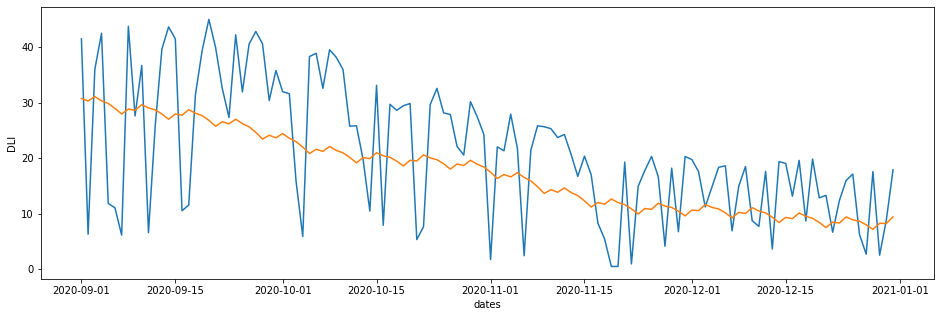

In [ ]:
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["DLI"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [ ]:
prophet_rmse_error = rmse(test_data['DLI'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df['DLI'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 111.07241928265829
RMSE Error: 10.539090059519289
Mean: 31.00258089802134


In [ ]:
rmse_errors = [arima_rmse_error, lstm_rmse_error, prophet_rmse_error]
mse_errors = [arima_mse_error, lstm_mse_error, prophet_mse_error]
errors = pd.DataFrame({"Models" : ["ARIMA", "LSTM", "Prophet"],"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors})

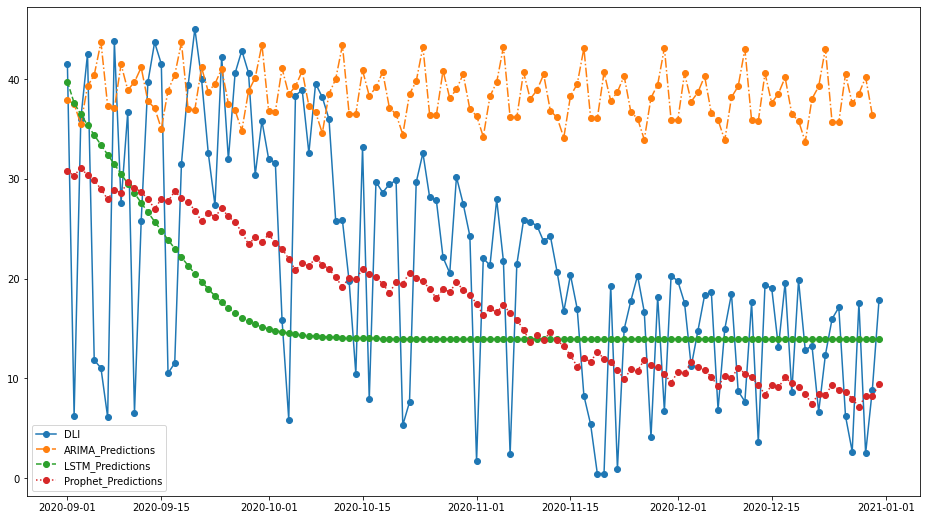

In [ ]:
plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, test_data["DLI"], linestyle="-")
plt.plot_date(test_data.index, test_data["ARIMA_Predictions"], linestyle="-.")
plt.plot_date(test_data.index, test_data["LSTM_Predictions"], linestyle="--")
plt.plot_date(test_data.index, test_data["Prophet_Predictions"], linestyle=":")
plt.legend(["DLI","ARIMA_Predictions","LSTM_Predictions","Prophet_Predictions"])
plt.show()


In [ ]:
print(f"Mean: {test_data['DLI'].mean()}")
errors

Mean: 21.404524191712206


,Models,RMSE Errors,MSE Errors
0,ARIMA,20.885525,436.205149
1,LSTM,12.875785,165.785829
2,Prophet,10.539090,111.072419


# RandomForest Forecast

In [ ]:
path = '/content/drive/MyDrive/ABCLABS/전북김제.xlsx'
#path = '/content/drive/MyDrive/ABCLABS/전북진안.xlsx'
data = pd.read_excel(path, sheet_name = '계산')

In [ ]:
df = data.loc[:,['dates','DLI']]
df.head()

,dates,DLI
0,2016-01-01,10.752194
1,2016-01-02,10.365014
2,2016-01-03,15.690333
3,2016-01-04,13.557667
4,2016-01-05,9.063833


In [ ]:
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # put it all together
    agg = concat(cols, axis=1)
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values

In [ ]:
def train_test_split(data, n_test):
    return data[:-n_test, :], data[-n_test:, :]

In [ ]:
def random_forest_forecast(train, testX):
    # transform list into array
    train = asarray(train)
    # split into input and output columns
    trainX, trainy = train[:, :-1], train[:, -1]
    # fit model
    model = RandomForestRegressor(n_estimators=1000)
    model.fit(trainX, trainy)
    # make a one-step prediction
    yhat = model.predict([testX])
    return yhat[0]

In [ ]:
def walk_forward_validation(data, n_test):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # split test row into input and output columns
        testX, testy = test[i, :-1], test[i, -1]
        # fit model on history and make a prediction
        yhat = random_forest_forecast(history, testX)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
        # summarize progress
        print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
    # estimate prediction error
    error = mean_absolute_error(test[:, -1], predictions)
    return error, test[:, -1], predictions

In [ ]:
df = df.set_index("dates")
df.head()


,DLI
dates,
2016-01-01,10.752194
2016-01-02,10.365014
2016-01-03,15.690333
2016-01-04,13.557667
2016-01-05,9.063833


In [ ]:
data = series_to_supervised(df, n_in=6)

In [ ]:
data

array([[10.75219444, 10.36501389, 15.69033333, ...,  9.06383333,
         7.86420833, 12.41834028],
       [10.36501389, 15.69033333, 13.55766667, ...,  7.86420833,
        12.41834028, 11.63445833],
       [15.69033333, 13.55766667,  9.06383333, ..., 12.41834028,
        11.63445833, 11.33613889],
       ...,
       [12.339     , 15.96009028, 17.10576389, ...,  2.66583333,
        17.57228472,  2.4849375 ],
       [15.96009028, 17.10576389,  6.22027778, ..., 17.57228472,
         2.4849375 ,  8.854375  ],
       [17.10576389,  6.22027778,  2.66583333, ...,  2.4849375 ,
         8.854375  , 17.88329861]])

In [ ]:
mae, y, yhat = walk_forward_validation(data, 162) # 원래 122
print('MAE: %.3f' % mae)

>expected=5.4, predicted=32.0
>expected=14.3, predicted=29.9
>expected=22.5, predicted=39.4
>expected=30.0, predicted=35.3
>expected=18.4, predicted=34.5
>expected=20.8, predicted=24.5
>expected=7.9, predicted=18.6
>expected=17.3, predicted=16.3
>expected=33.3, predicted=17.6
>expected=20.9, predicted=21.4
>expected=34.9, predicted=24.5
>expected=36.3, predicted=33.1
>expected=47.3, predicted=29.7
>expected=22.7, predicted=33.0
>expected=12.1, predicted=31.2
>expected=1.3, predicted=27.2
>expected=0.7, predicted=23.9
>expected=24.5, predicted=35.8
>expected=16.2, predicted=31.6
>expected=16.5, predicted=20.0
>expected=25.8, predicted=14.1
>expected=51.0, predicted=21.1
>expected=35.7, predicted=39.2
>expected=53.0, predicted=31.0
>expected=55.5, predicted=43.4
>expected=52.2, predicted=41.5
>expected=56.0, predicted=37.5
>expected=59.0, predicted=40.3
>expected=54.0, predicted=47.4
>expected=57.5, predicted=46.2
>expected=26.2, predicted=50.1
>expected=51.9, predicted=38.6
>expected=54

KeyboardInterrupt: ignored

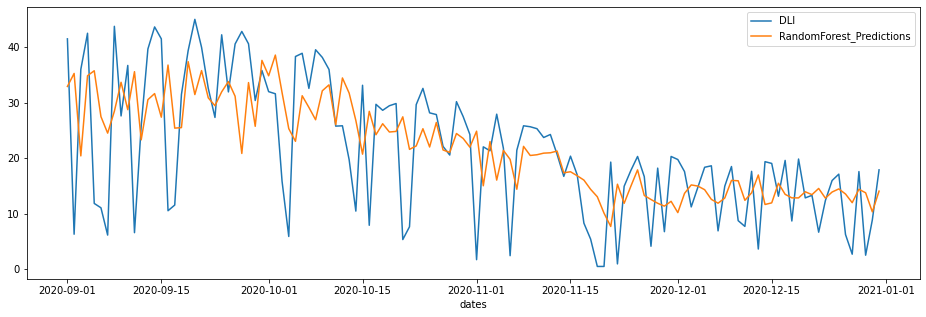

In [ ]:
plt.figure(figsize=(16,5))
# pyplot.plot(y, label='DLI')
# pyplot.plot(yhat, label='RandomForest_Predictions')
# pyplot.legend()
# pyplot.show()

ax = sns.lineplot(x= test_data.index, y=y, label = 'DLI')
sns.lineplot(x=test_data.index, y = yhat, label='RandomForest_Predictions');

In [ ]:
RF = yhat
print(test_data['DLI'])

dates
2020-09-01    41.517181
2020-09-02     6.271056
2020-09-03    36.007792
2020-09-04    42.526389
2020-09-05    11.824875
                ...    
2020-12-27     2.665833
2020-12-28    17.572285
2020-12-29     2.484938
2020-12-30     8.854375
2020-12-31    17.883299
Name: DLI, Length: 122, dtype: float64


In [ ]:
RF_rmse_error = rmse(y, RF)
RF_mse_error = RF_rmse_error**2
mean_value = df['DLI'].mean()

print(f'MSE Error: {RF_mse_error}\nRMSE Error: {RF_rmse_error}\nMean: {mean_value}')

MSE Error: 101.15591067116513
RMSE Error: 10.057629475734585
Mean: 31.00258089802134


In [ ]:
rmse_errors = [arima_rmse_error, lstm_rmse_error, prophet_rmse_error,RF_rmse_error]
mse_errors = [arima_mse_error, lstm_mse_error, prophet_mse_error,RF_mse_error]
errors = pd.DataFrame({"Models" : ["ARIMA", "LSTM", "Prophet","RandomForest"],"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors})

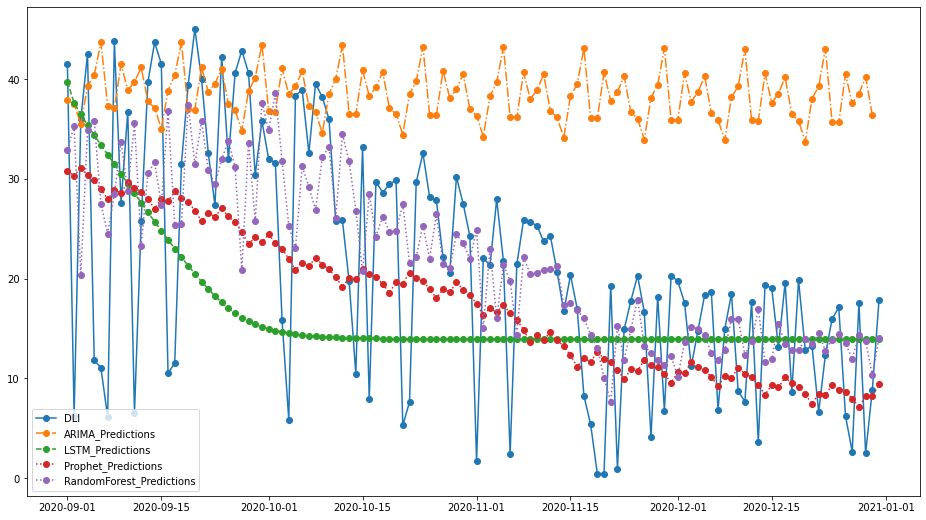

In [ ]:
plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, test_data["DLI"], linestyle="-")
plt.plot_date(test_data.index, test_data["ARIMA_Predictions"], linestyle="-.")
plt.plot_date(test_data.index, test_data["LSTM_Predictions"], linestyle="--")
plt.plot_date(test_data.index, test_data["Prophet_Predictions"], linestyle=":")
plt.plot_date(test_data.index, RF, linestyle=":")
plt.legend(["DLI","ARIMA_Predictions","LSTM_Predictions","Prophet_Predictions","RandomForest_Predictions"])
plt.show()

In [ ]:
print(f"Mean: {test_data['DLI'].mean()}")
errors

Mean: 21.404524191712206


,Models,RMSE Errors,MSE Errors
0,ARIMA,20.885525,436.205149
1,LSTM,12.875785,165.785829
2,Prophet,10.539090,111.072419
3,RandomForest,10.057629,101.155911


In [ ]:
test_data["RandomForest_Predictions"] = RF
test_data

,DLI,ARIMA_Predictions,LSTM_Predictions,Prophet_Predictions,RandomForest_Predictions
dates,,,,,
2020-09-01,41.517181,37.907516,39.742237,30.764968,32.929614
2020-09-02,6.271056,37.479554,37.599908,30.300100,35.277360
2020-09-03,36.007792,35.501839,36.460913,31.110722,20.402673
2020-09-04,42.526389,39.279271,35.385670,30.338339,34.867367
2020-09-05,11.824875,40.407433,34.379588,29.846435,35.759774
...,...,...,...,...,...
2020-12-27,2.665833,37.549432,13.934692,7.968271,11.957783
2020-12-28,17.572285,38.516907,13.934692,7.149826,14.382107
2020-12-29,2.484938,40.179003,13.934692,8.244619,13.742136


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(test_data["DLI"][:-1].values,test_data["LSTM_Predictions"][:-1].values)

-0.15208228868289053

In [ ]:
test_data["ARIMA_Predictions"].values

array([37.90751583, 37.47955396, 35.501839  , 39.27927142, 40.40743327,
       43.69980662, 37.31820798, 37.05271149, 41.47226066, 38.89008056,
       39.70331174, 41.15819941, 37.7596063 , 37.1123098 , 35.02743558,
       38.83803226, 40.40873385, 43.6686598 , 36.96619111, 36.94225644,
       41.16444984, 38.72163574, 39.52002022, 41.02747103, 37.51907246,
       36.86103066, 34.83859065, 38.77679277, 40.12978234, 43.44899842,
       36.83725776, 36.73937407, 41.06785271, 38.45264916, 39.28257111,
       40.7813161 , 37.31854243, 36.66960736, 34.57891865, 38.51525454,
       40.00434094, 43.40064704, 36.52435145, 36.51253406, 40.88409971,
       38.31719309, 39.15868699, 40.70562928, 37.12446228, 36.4644423 ,
       34.43578142, 38.49931952, 39.77051604, 43.22578207, 36.43971488,
       36.3536889 , 40.83117983, 38.09165715, 38.96435344, 40.5022927 ,
       36.96635399, 36.31511284, 34.21794711, 38.27936465, 39.68618335,
       43.21822191, 36.16745654, 36.16711848, 40.68742316, 37.99